<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [16]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


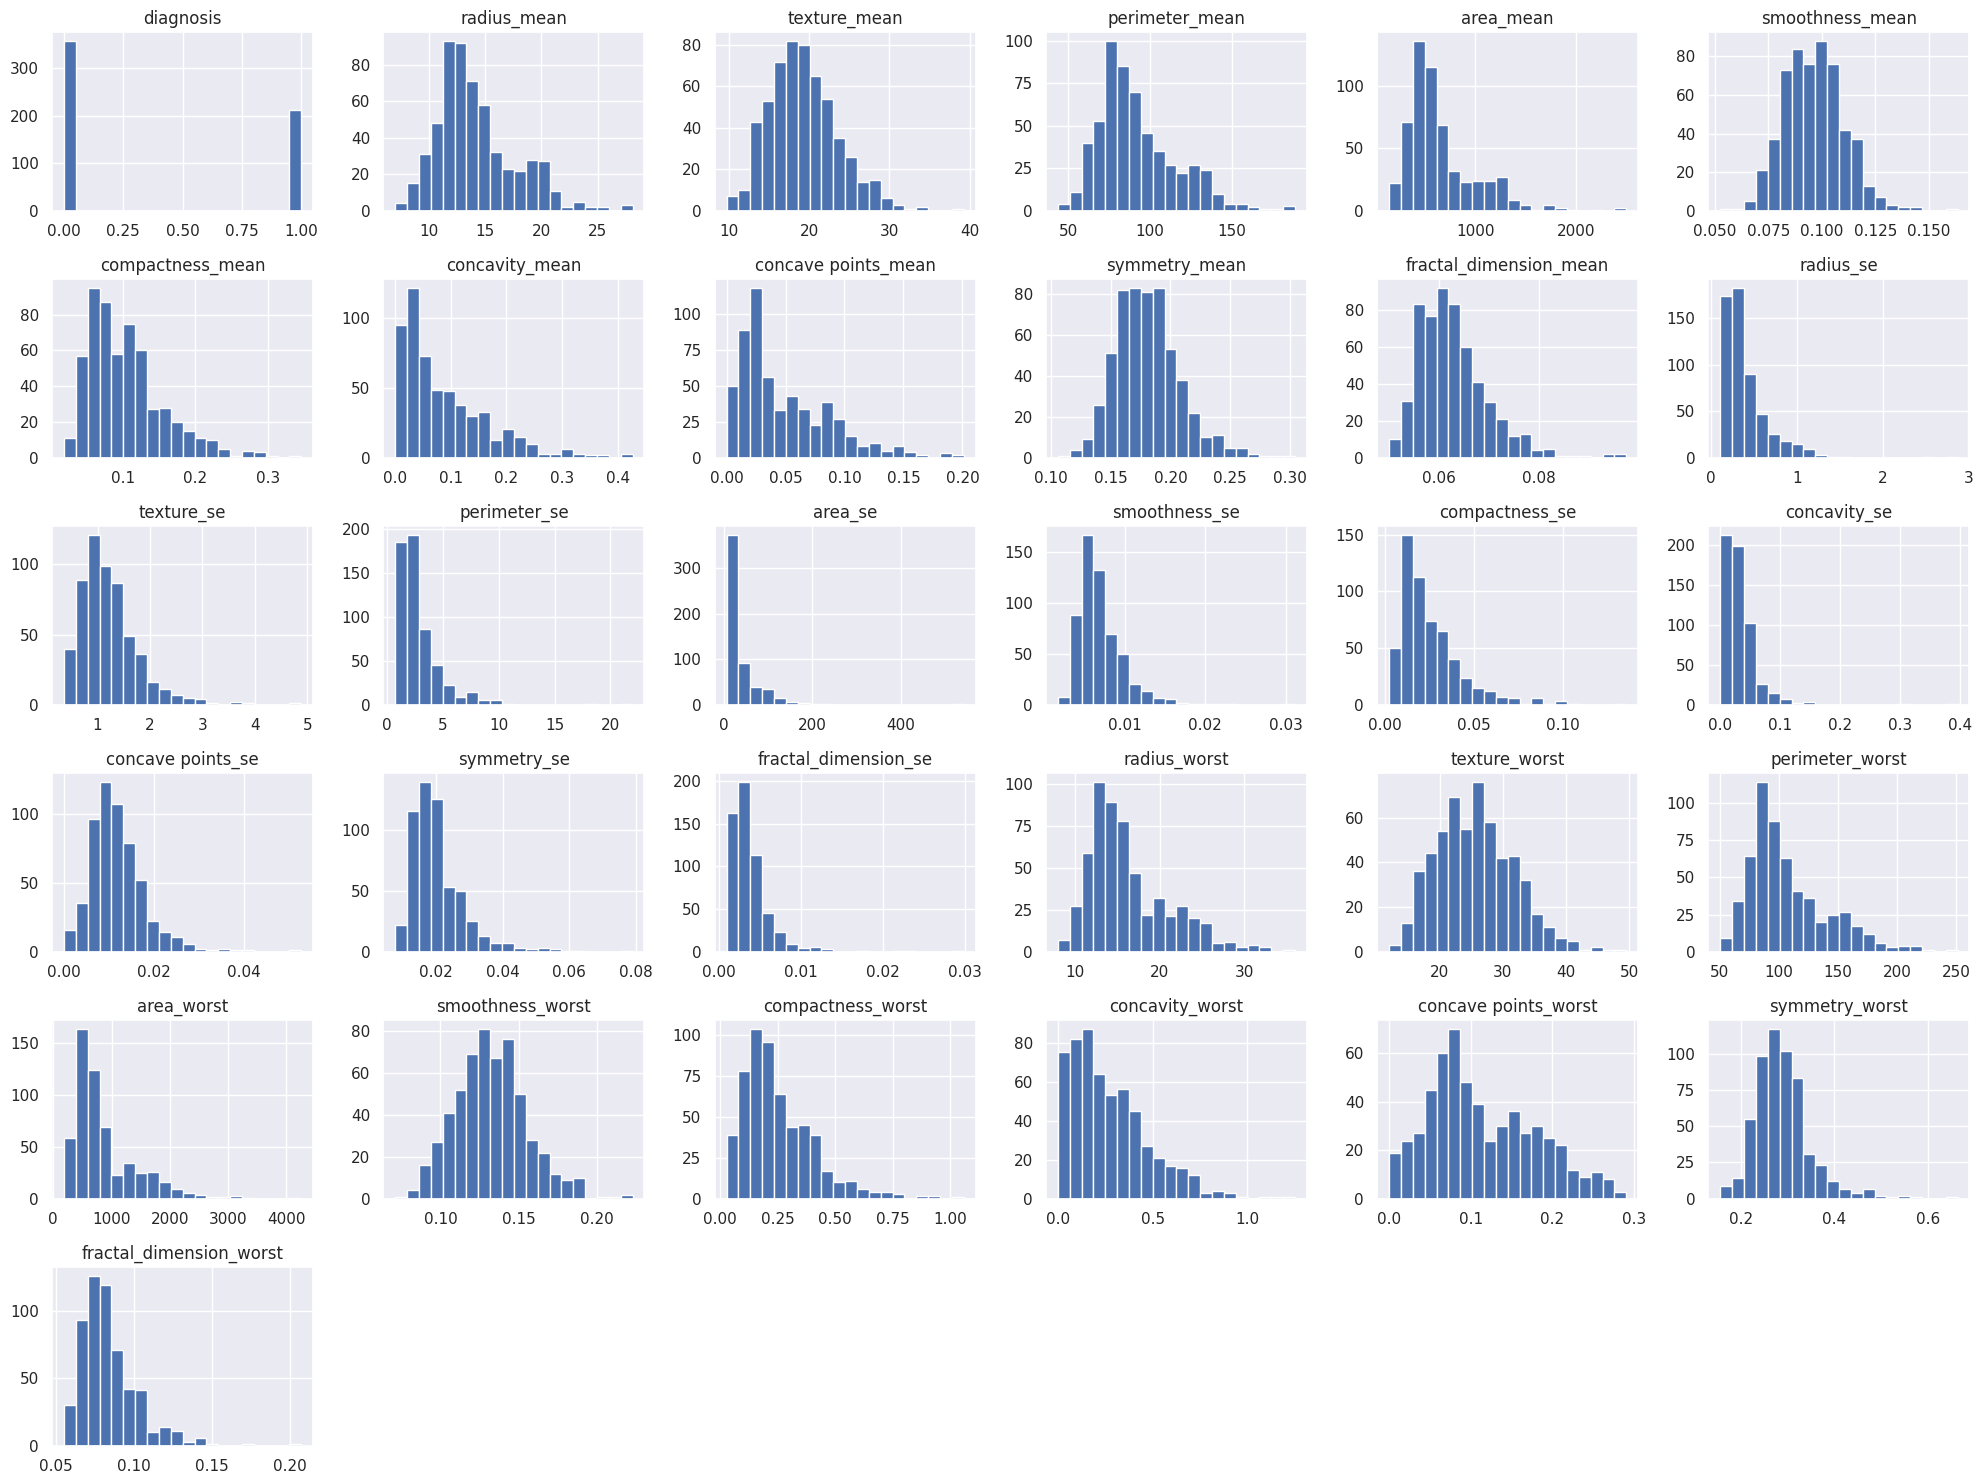

In [17]:
# 1.1 Análisis de distribución de variables
df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

Análisis: Al analizar la distribución de las variables mediante los histogramas, se puede ver cómo se comportan los valores de cada característica del conjunto de datos. En general, muchas variables tienen una forma parecida a la de una campana, pero otras se inclinan hacia la derecha, lo que indica que la mayoría de los valores son bajos y unos pocos son mucho más altos. En particular, variables como area_mean o perimeter_mean presentan colas largas hacia la derecha, lo que sugiere la existencia de valores extremos.
Esto es importante porque esos sesgos y valores atípicos pueden influir en el desempeño de algunos modelos, por lo que más adelante será necesario aplicar técnicas de normalización o transformación para equilibrar los datos antes del modelado.

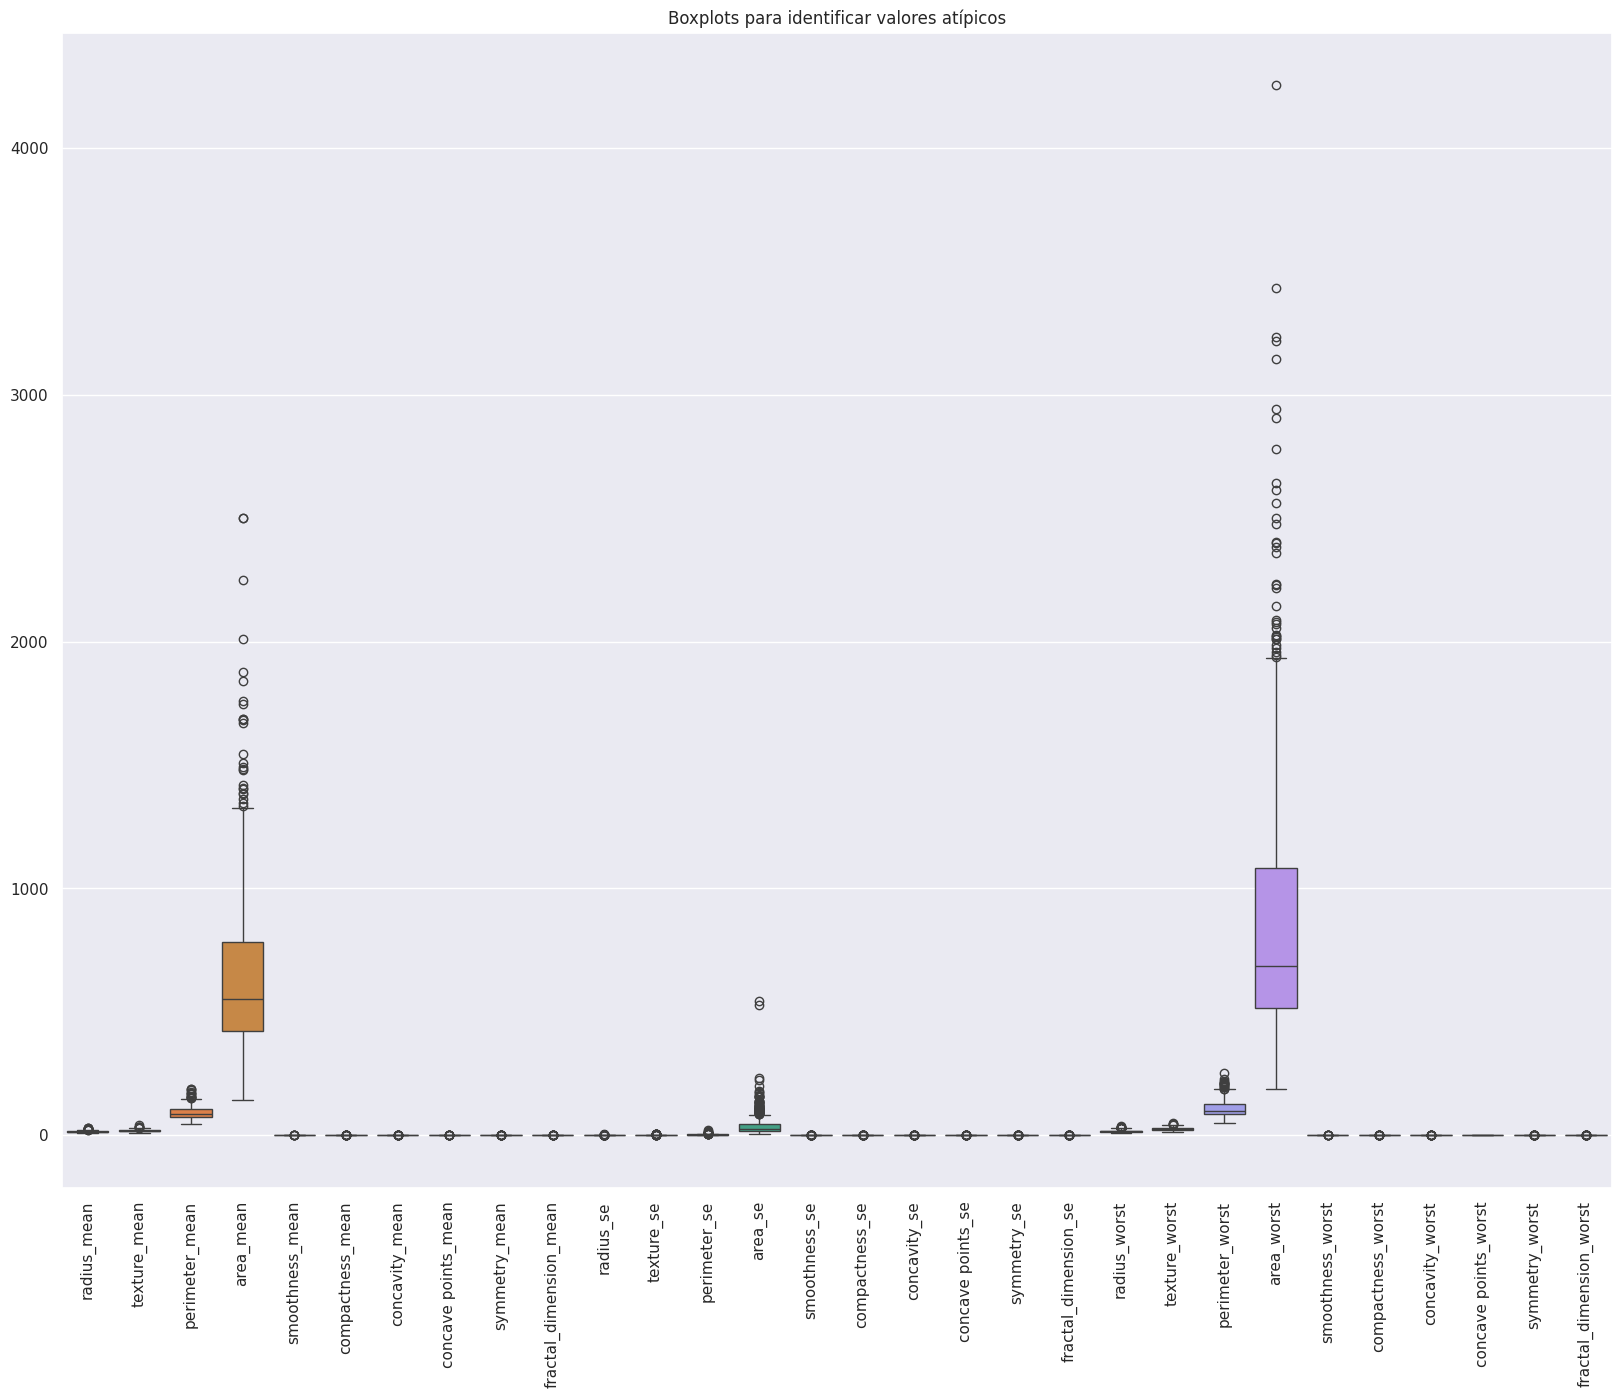

In [18]:
# 1.1 Identificación de valores atípicos
df_numeric = df.drop('diagnosis', axis=1)

plt.figure(figsize=(20, 15))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)
plt.title('Boxplots para identificar valores atípicos')
plt.show()

Análisis: Se opta por usar los diagramas de caja, ya que permiten ver cómo se distribuyen los datos y detectar fácilmente los valores que se alejan del resto. En este caso, muchas variables muestran puntos fuera del rango normal, sobre todo hacia los valores más altos, lo que confirma la presencia de valores atípicos. Esto ocurre con mayor frecuencia en variables como area_mean, perimeter_mean y radius_mean, así como en sus versiones “worst”.
Estos valores extremos pueden influir en los resultados de algunos modelos, ya que tienden a alterar medidas como la media o la desviación estándar. Aunque ciertos modelos, como los basados en árboles, no se ven tan afectados, es importante tenerlos presentes y decidir más adelante si se deben ajustar o tratar de alguna manera.

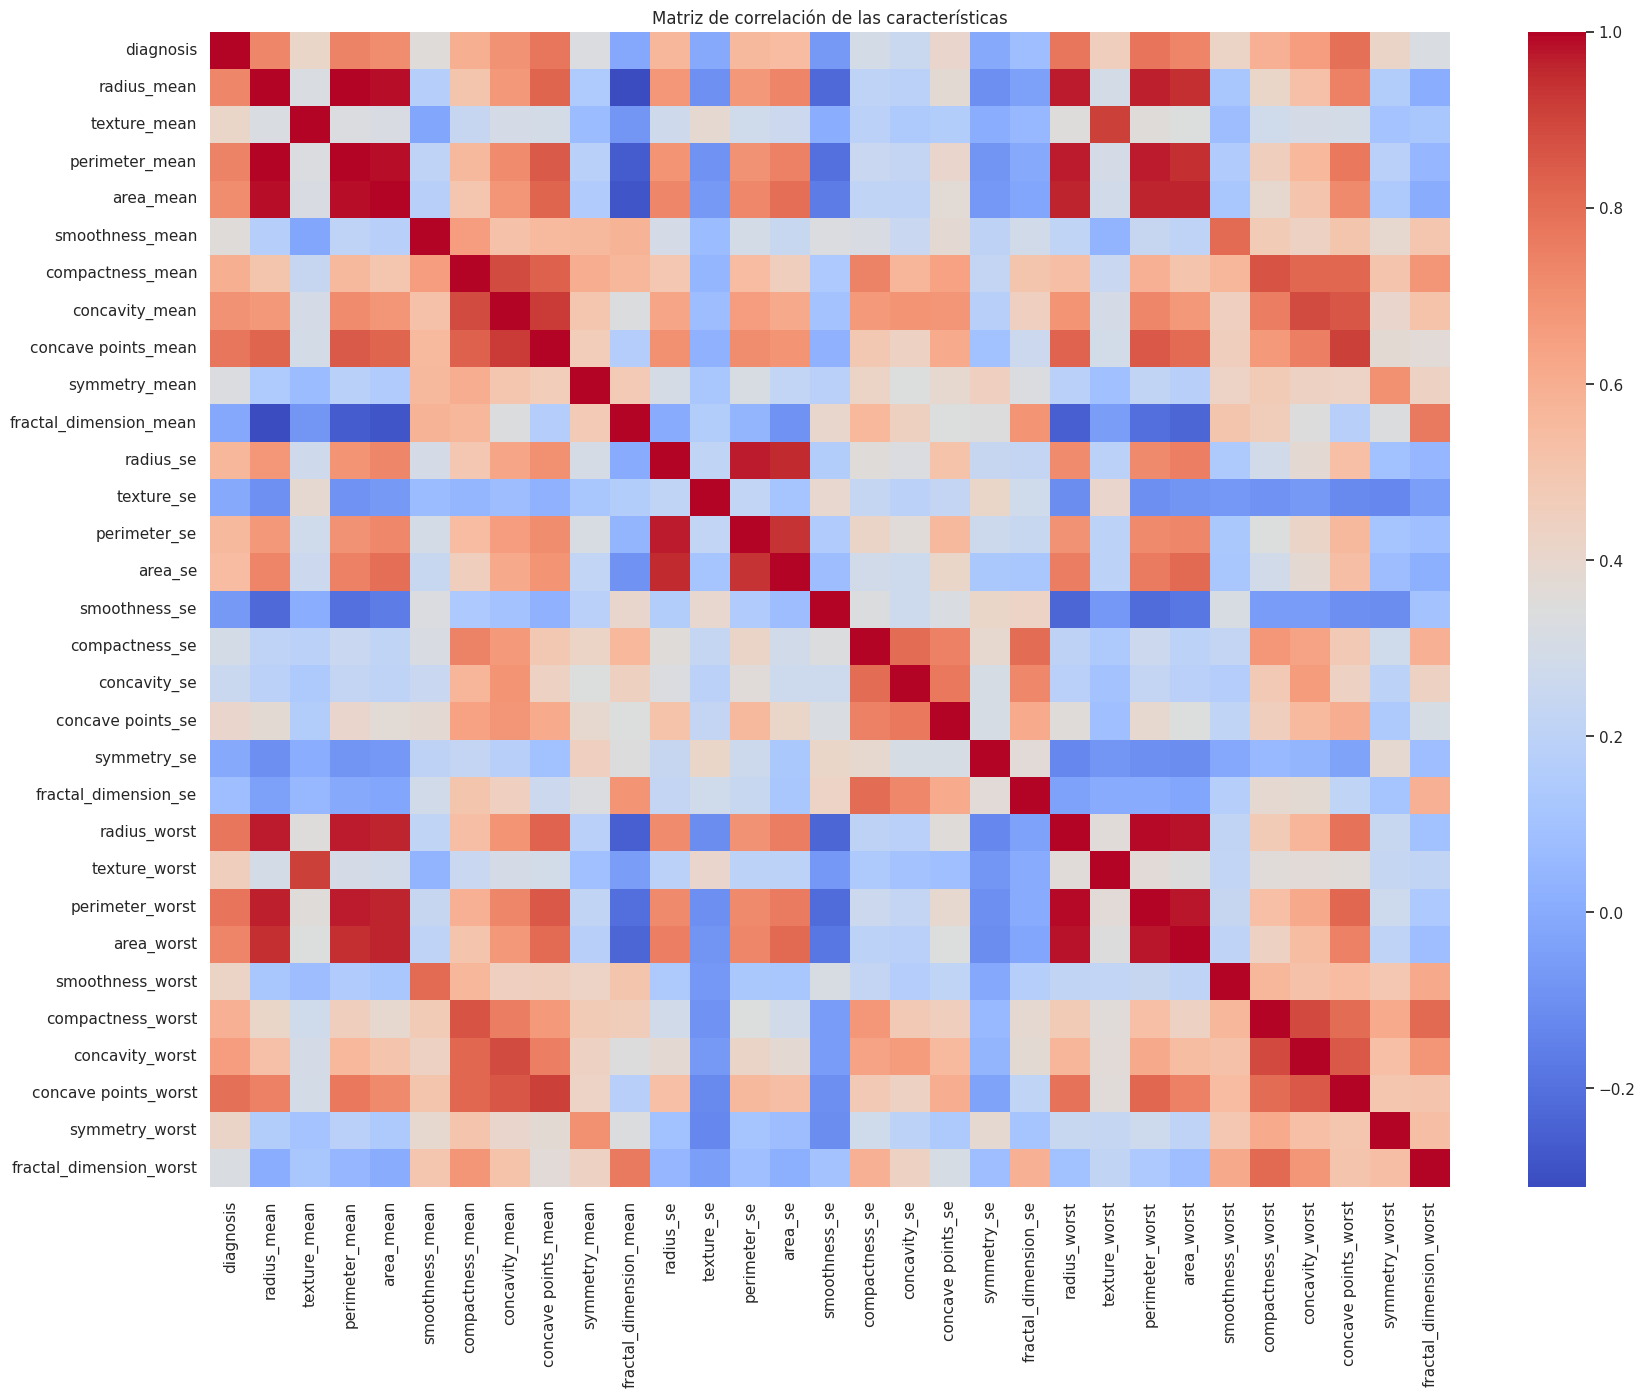

In [19]:
# 1.1 Análisis de correlación entre características
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de correlación de las características')
plt.show()

Análisis: Finalmente, se usa un mapa de calor, el cual permite observar cómo se relacionan las distintas variables entre sí. En él se nota que muchas de las características que miden aspectos parecidos del núcleo celular están muy relacionadas, especialmente aquellas que describen el tamaño, como radius_mean, perimeter_mean y area_mean, junto con sus versiones “worst”. Esto tiene sentido, ya que todas reflejan medidas similares.
También se aprecia que la variable diagnosis está moderada o fuertemente asociada con varias de estas características, sobre todo las relacionadas con el tamaño, la concavidad y la compacidad, lo que indica que pueden ser útiles para distinguir entre tumores benignos y malignos.
Sin embargo, la alta relación entre variables similares puede causar redundancia o confusión en algunos modelos más sensibles a la correlación, por lo que más adelante puede ser necesario aplicar técnicas de reducción de dimensiones o selección de variables para simplificar el análisis.

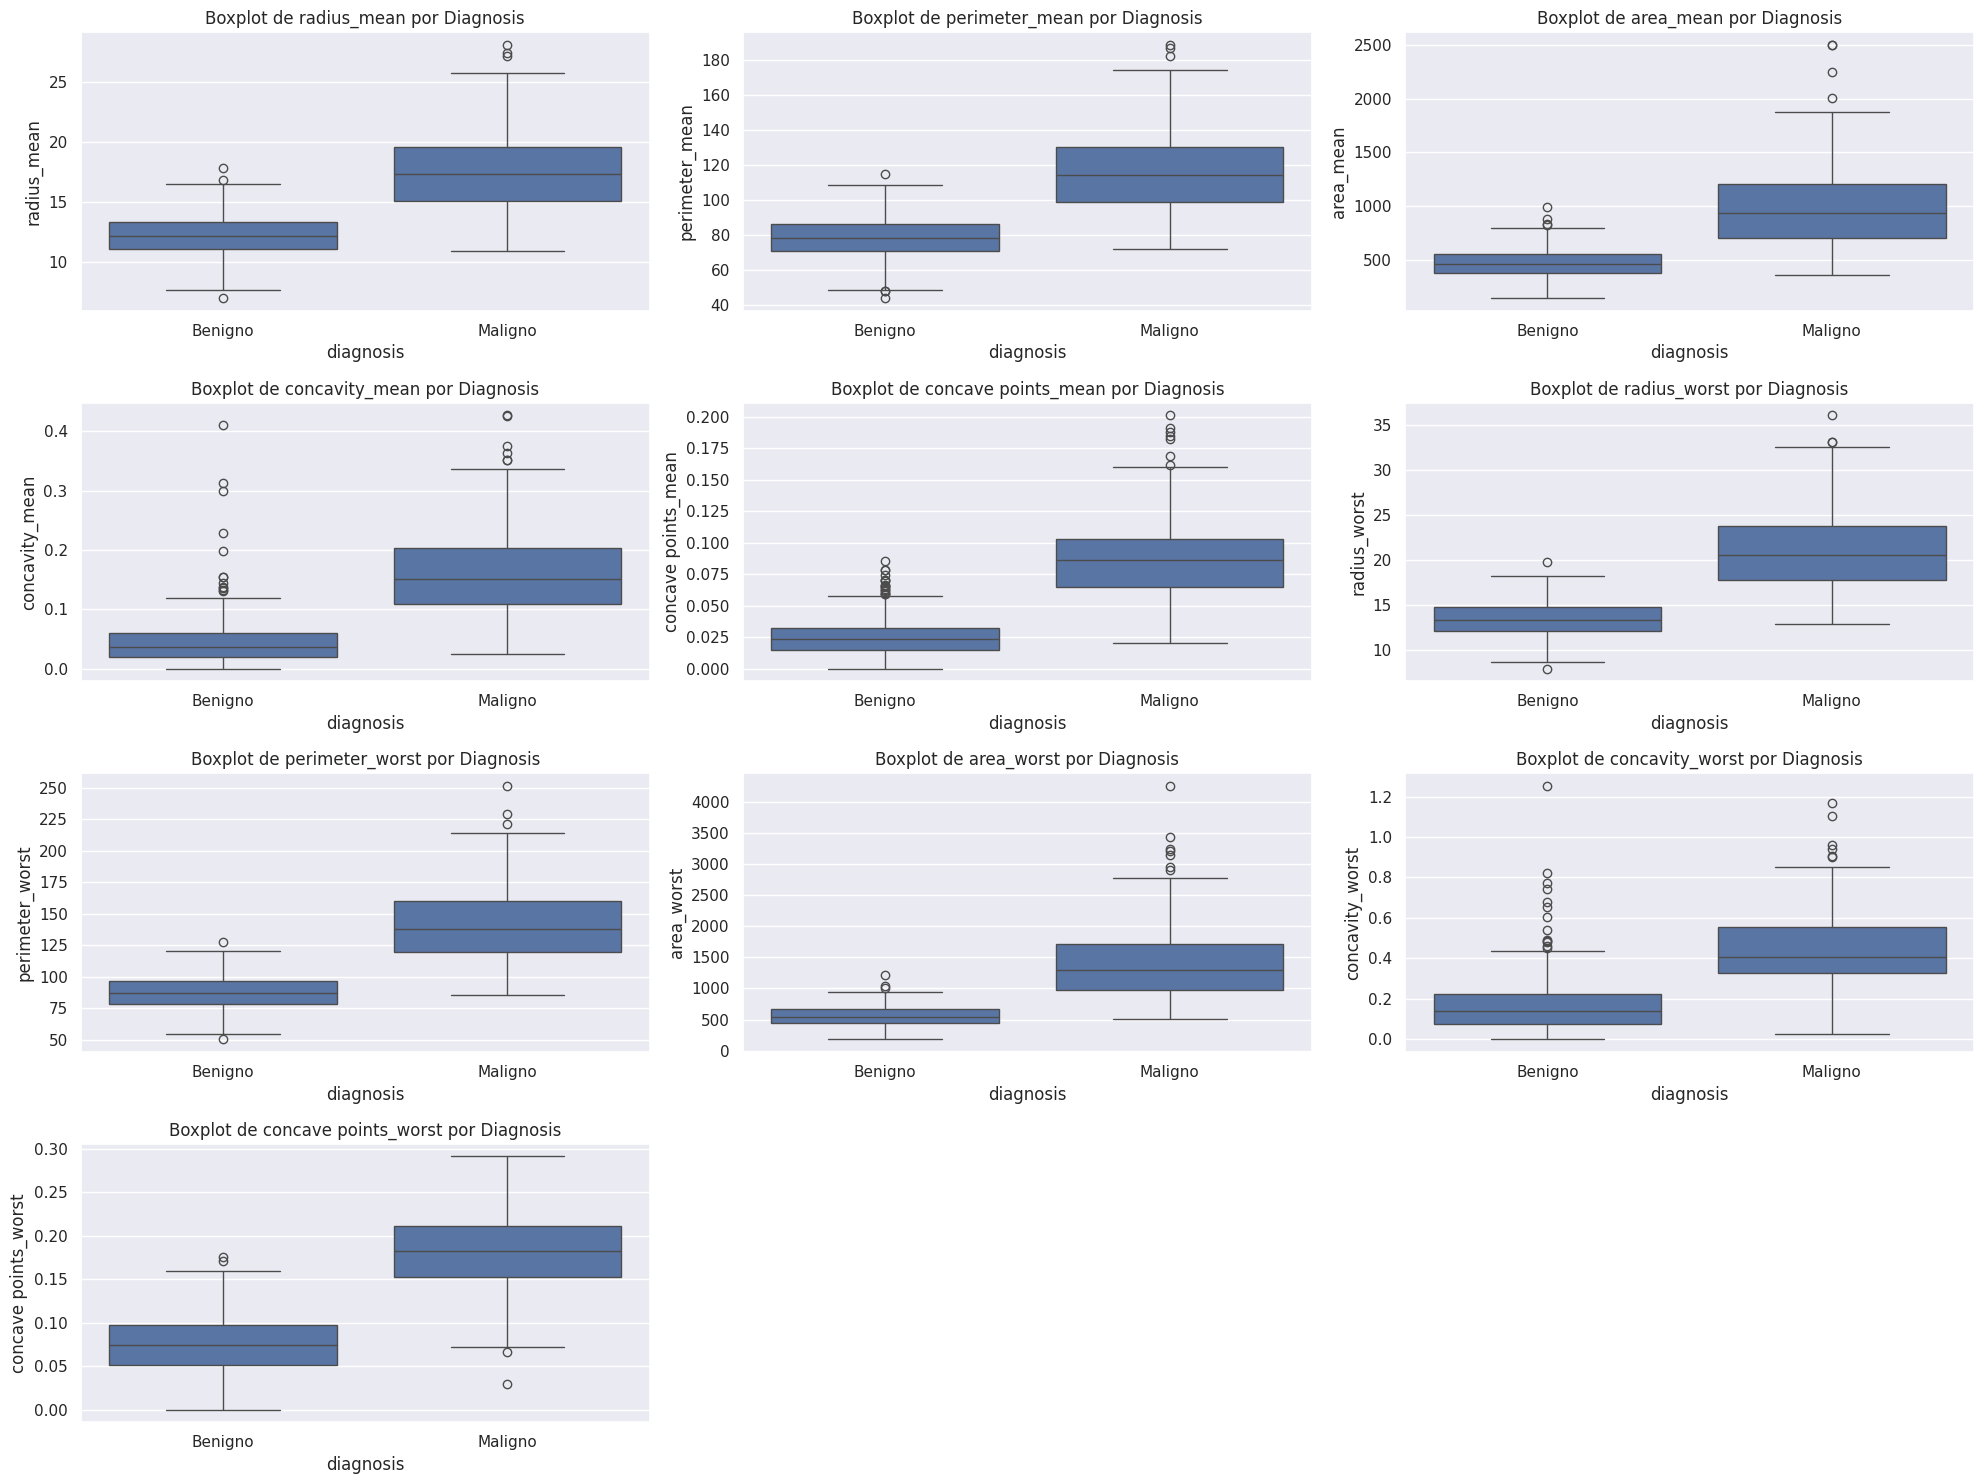

In [20]:
# 1.2 Visualización de diferencias entre tumores benignos y malignos
variables_clave = ['radius_mean', 'perimeter_mean', 'area_mean',
                   'concavity_mean', 'concave points_mean',
                   'radius_worst', 'perimeter_worst', 'area_worst',
                   'concavity_worst', 'concave points_worst']

plt.figure(figsize=(20, 15))
for i, var in enumerate(variables_clave):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='diagnosis', y=var, data=df)
    plt.title(f'Boxplot de {var} por Diagnosis')
    plt.xticks([0, 1], ['Benigno', 'Maligno'])
plt.tight_layout()
plt.show()

Respuesta: Se analizaron algunas variables que tenían una relación más fuerte con el diagnóstico. Los diagramas de caja muestran que las diferencias entre ambos tipos de tumores son claras, en general, los tumores malignos presentan valores más altos en características como radius_mean, perimeter_mean, area_mean, concavity_mean y concave points_mean, así como en sus versiones “worst”.

**1.3**

Respuesta: Se puede ver que las variables que mejor distinguen entre tumores benignos y malignos son principalmente las relacionadas con el tamaño del núcleo y la forma del contorno, esto debido a que las características como radius, perimeter y area (tanto en su versión mean como worst) muestran diferencias muy marcadas entre ambos tipos de tumores: los malignos tienden a tener valores bastante más altos, lo que indica núcleos más grandes.
Del mismo modo, las variables que describen la concavidad y los puntos cóncavos (concavity y concave points) también destacan por su capacidad para separar los grupos, ya que los tumores malignos presentan contornos más irregulares y pronunciados.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [21]:
# 2.1
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#2.2
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print("Factores de Inflación de Varianza (VIF):")
display(vif_data.sort_values(by='VIF', ascending=False))

Factores de Inflación de Varianza (VIF):


,feature,VIF
0,radius_mean,63306.172036
2,perimeter_mean,58123.586079
20,radius_worst,9674.742602
22,perimeter_worst,4487.781270
3,area_mean,1287.262339
23,area_worst,1138.759252
9,fractal_dimension_mean,629.679874
29,fractal_dimension_worst,423.396723
4,smoothness_mean,393.398166
24,smoothness_worst,375.597155


**2.3**

Justificación: Se optia por la eliminación de multicolinealidad, ya que en el análisis anterior se observó una alta correlación entre varias variables. Para ello se usará el factor de inflación de varianza VIF, que permite detectar qué variables están demasiado relacionadas con otras. Si alguna presenta un valor de VIF muy alto (mayor a 10), podría ser conveniente eliminarla para evitar que afecte el rendimiento de ciertos modelos.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


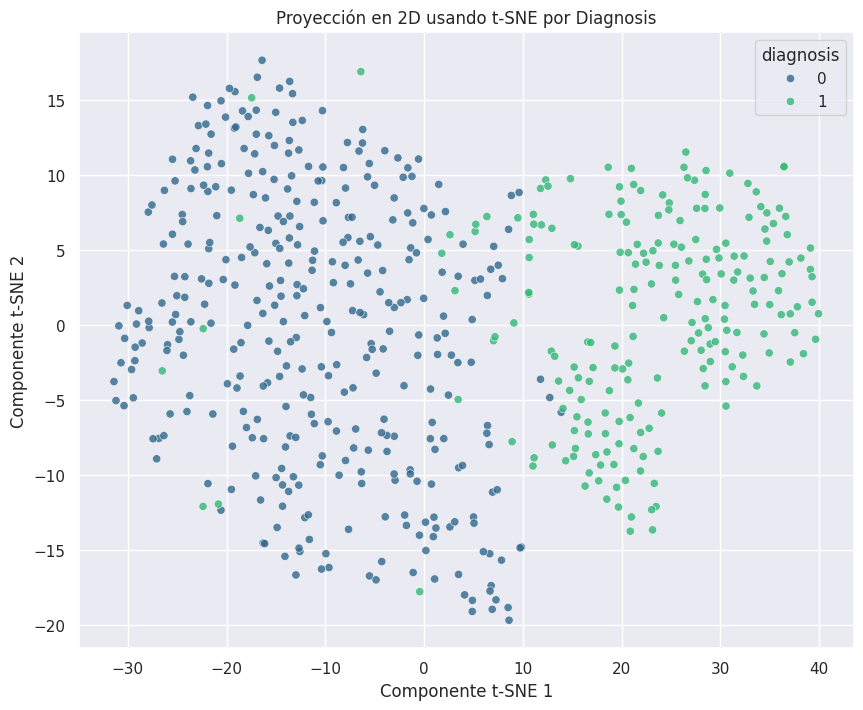

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


tsne_df = pd.DataFrame(data = X_tsne, columns = ['t-SNE1', 't-SNE2'])
tsne_df['diagnosis'] = y.values


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='t-SNE1', y='t-SNE2',
    hue='diagnosis',
    palette=sns.color_palette("viridis", 2),
    data=tsne_df,
    legend="full",
    alpha=0.8
)
plt.title("Proyección en 2D usando t-SNE por Diagnosis")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.grid(True)
plt.show()

Análisis formación de clústeres con t-SNE:

Analizando el grafico, se aprecia que los tumores benignos y malignos tienden a formar clústeres separados, aunque existe algo de superposición. Dentro de cada clase, los puntos se agrupan de manera compacta, lo que indica que los tumores de un mismo tipo son similares entre sí en este espacio reducido. Esto demuestra que las características originales contienen suficiente información para diferenciar las clases.


Comparación:

Al comparar t-SNE con las visualizaciones anteriores, se observa que esta técnica permite ver la separación de las clases de manera más completa. Mientras que los histogramas y boxplots mostraban diferencias por variable de forma individual y el mapa de calor indicaba correlaciones, t-SNE combina toda la información de las características y proyecta los datos en dos dimensiones. En esta visualización, los tumores benignos y malignos forman clústeres bien diferenciados, con muy poca superposición, lo que indica que las clases se separan claramente en el espacio reducido. Esto confirma que las características originales contienen suficiente información discriminativa y que la reducción de dimensionalidad con t-SNE es útil para visualizar y resaltar las diferencias entre ambos tipos de tumores.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y) # stratify=y para mantener la proporción de clases

print("Forma de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Forma de los conjuntos de datos:
X_train: (426, 30)
X_test: (143, 30)
y_train: (426,)
y_test: (143,)


In [25]:
# 4.1
#Regresión Logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

#SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("--- Evaluación de Modelos Base ---")

#Métricas para Regresión Logística
print("\nRegresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")

#Métricas para SVM
print("\nSVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}")

#Métricas para Random Forest
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")

--- Evaluación de Modelos Base ---

Regresión Logística:
Accuracy: 0.9650
Precision: 0.9800
Recall: 0.9245
F1-score: 0.9515

SVM:
Accuracy: 0.9720
Precision: 1.0000
Recall: 0.9245
F1-score: 0.9608

Random Forest:
Accuracy: 0.9650
Precision: 1.0000
Recall: 0.9057
F1-score: 0.9505


In [26]:
# 4.2
#Regresión Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_

print("Mejores parámetros para Regresión Logística:", grid_search_lr.best_params_)
print("Mejor accuracy en CV para Regresión Logística:", grid_search_lr.best_score_)

#SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_

print("\nMejores parámetros para SVM:", grid_search_svm.best_params_)
print("Mejor accuracy en CV para SVM:", grid_search_svm.best_score_)


#Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

print("\nMejores parámetros para Random Forest:", grid_search_rf.best_params_)
print("Mejor accuracy en CV para Random Forest:", grid_search_rf.best_score_)

Mejores parámetros para Regresión Logística: {'C': 0.1, 'solver': 'liblinear'}
Mejor accuracy en CV para Regresión Logística: 0.9765253077975377

Mejores parámetros para SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mejor accuracy en CV para SVM: 0.9788782489740082

Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor accuracy en CV para Random Forest: 0.9647606019151848


--- Evaluación de Regresión Logística Optimizada ---
Accuracy: 0.9860
Precision: 1.0000
Recall: 0.9623
F1-score: 0.9808
Matriz de Confusión:
 [[90  0]
 [ 2 51]]
AUC-ROC: 0.9985

--- Evaluación de SVM Optimizado ---
Accuracy: 0.9790
Precision: 1.0000
Recall: 0.9434
F1-score: 0.9709
Matriz de Confusión:
 [[90  0]
 [ 3 50]]
AUC-ROC no disponible: SVC no fue entrenado con probability=True

--- Evaluación de Random Forest Optimizado ---
Accuracy: 0.9650
Precision: 1.0000
Recall: 0.9057
F1-score: 0.9505
Matriz de Confusión:
 [[90  0]
 [ 5 48]]
AUC-ROC: 0.9945


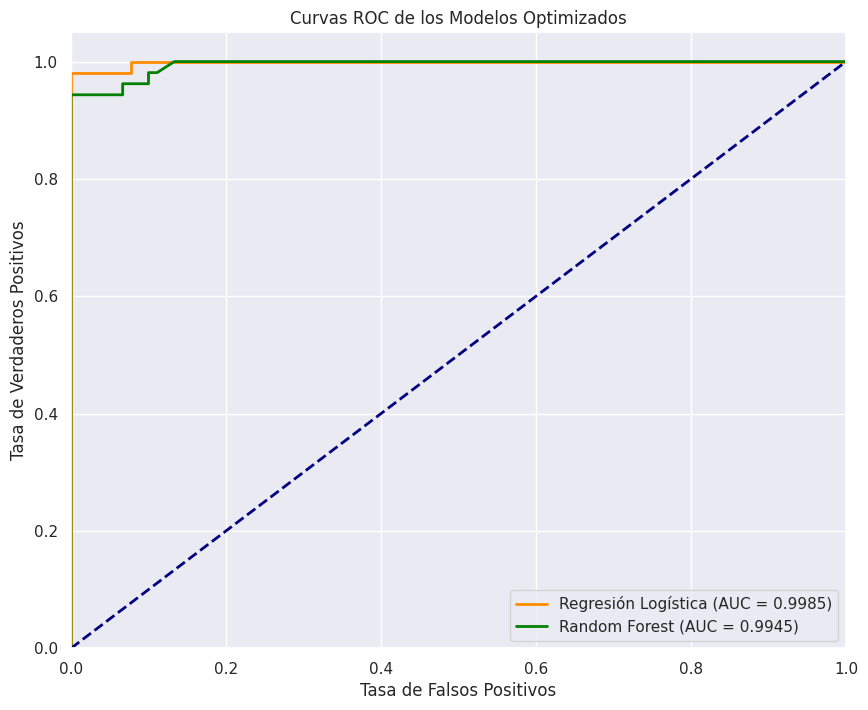

In [27]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 4.3

#Regresión Logística Optimizada
y_pred_lr_opt = best_lr.predict(X_test)
y_proba_lr_opt = best_lr.predict_proba(X_test)[:, 1] # Probabilidades para ROC

print("--- Evaluación de Regresión Logística Optimizada ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_opt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr_opt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr_opt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr_opt):.4f}")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr_opt))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr_opt)
auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC-ROC: {auc_lr:.4f}")

try:
    y_pred_svm_opt = best_svm.predict(X_test)
    y_proba_svm_opt = best_svm.predict_proba(X_test)[:, 1] # Probabilidades para ROC si probability=True
    print("\n--- Evaluación de SVM Optimizado ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_opt):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_svm_opt):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_svm_opt):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred_svm_opt):.4f}")
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm_opt))
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm_opt)
    auc_svm = auc(fpr_svm, tpr_svm)
    print(f"AUC-ROC: {auc_svm:.4f}")
except AttributeError:
    y_pred_svm_opt = best_svm.predict(X_test)
    print("\n--- Evaluación de SVM Optimizado ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_opt):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_svm_opt):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_svm_opt):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred_svm_opt):.4f}")
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_svm_opt))
    print("AUC-ROC no disponible: SVC no fue entrenado con probability=True")


#Random Forest Optimizado
y_pred_rf_opt = best_rf.predict(X_test)
y_proba_rf_opt = best_rf.predict_proba(X_test)[:, 1] # Probabilidades para ROC

print("\n--- Evaluación de Random Forest Optimizado ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_opt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf_opt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf_opt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf_opt):.4f}")
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_opt))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf_opt)
auc_rf = auc(fpr_rf, tpr_rf)
print(f"AUC-ROC: {auc_rf:.4f}")

#Opcional: Visualizar curvas ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Regresión Logística (AUC = {auc_lr:.4f})')
if 'auc_svm' in locals():
    plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM (AUC = {auc_svm:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los Modelos Optimizados')
plt.legend(loc="lower right")
plt.show()

**Análisis y comparación de modelos:**

Al comparar los modelos optimizados, todos muestran una alta precisión, con cero falsos positivos, lo cual es ideal para minimizar diagnósticos erróneos de tumores benignos como malignos. Sin embargo, las diferencias clave aparecen en el Recall, que mide la capacidad de detectar correctamente los tumores malignos reales. La Regresión Logística optimizada alcanza el Recall más alto, con solo 2 falsos negativos, seguida de cerca por SVM y luego Random Forest. Esto se refleja también en el F1-score, que combina precisión y Recall, donde la Regresión Logística obtiene el valor más alto.
En conjunto, estas métricas indican que la Regresión Logística ofrece el mejor equilibrio entre precisión y generalización, detectando la mayoría de los tumores malignos sin sacrificar la exactitud de las predicciones.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



**5.1:** Analizando las métricas de los modelos optimizados, la Regresión Logística se muestra como la opción más apropiada para este conjunto de datos. Su Recall más alto indica que detecta correctamente la mayoría de los tumores malignos, mientras que mantiene una precisión perfecta, evitando falsos positivos. Además, su F1-score y AUC-ROC son excelentes, y el modelo es más simple e interpretable que SVM o Random Forest, lo que es valioso en un contexto médico. Por estas razones, ofrece el mejor equilibrio entre detectar tumores malignos y evitar diagnósticos incorrectos, convirtiéndolo en la alternativa más confiable para esta tarea de clasificación.


**5.2:** El preprocesamiento y la reducción de dimensionalidad tuvieron un impacto importante en los resultados obtenidos. La normalización de las variables aseguró que ninguna característica dominara a otras por su escala, lo que facilitó que modelos sensibles a la magnitud de los datos, como SVM y Regresión Logística, funcionaran correctamente y lograran alta precisión y Recall. El análisis de multicolinealidad mostró que algunas variables estaban muy correlacionadas, lo que podría afectar la interpretación de modelos lineales, aunque no afectó significativamente el rendimiento en este caso. Por último, la reducción de dimensionalidad con t-SNE, aunque se utilizó solo para visualización, permitió ver claramente cómo se separan los clústeres de tumores benignos y malignos, confirmando que las características originales contienen suficiente información discriminativa.

**5.3:** En un escenario real de diagnóstico médico asistido por machine learning, el sistema podría mejorarse incorporando más tipos de datos, como información de imágenes médicas, antecedentes clínicos o datos genéticos, para lograr predicciones más precisas. También sería útil probar modelos más avanzados o combinaciones de varios modelos, lo que ayudaría a hacer el sistema más confiable y menos propenso a errores. En la práctica médica, suele haber menos casos positivos de enfermedad, por lo que sería importante aplicar técnicas que equilibren los datos y eviten que el modelo se sesgue hacia la clase mayoritaria. Además, antes de usarlo en hospitales, el modelo debería probarse con datos de distintas fuentes para asegurarse de que funcione bien en diferentes contextos. Otro punto fundamental es la explicabilidad: los médicos deben entender por qué el sistema llega a una determinada conclusión, para poder confiar en sus resultados y tomar mejores decisiones. Finalmente, habría que considerar los aspectos éticos y regulatorios, integrarlo de manera natural al trabajo clínico diario, y mantener un seguimiento constante de su desempeño para detectar posibles fallas con el tiempo. En conjunto, un sistema de este tipo requeriría más validaciones, transparencia y cuidado en su aplicación para ser realmente útil y seguro en la práctica médica